# **Efficientnet**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
File_name='/content/drive/MyDrive/Project/2500latest.zip'
with ZipFile(File_name,'r') as zip:
   zip.extractall()
   print('done')

done


In [3]:
import numpy as np
import seaborn as sns
#from keras_preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import os
print(os.listdir("/content/s2500latest/2500latest/"))
%matplotlib inline

['surprise', 'fear', 'neutral', 'happy', 'disgust', 'sad', 'angry']


In [4]:

!pip install split-folders
import splitfolders 
splitfolders.ratio("/content/s2500latest/2500latest/", output="/content/new2500/", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 17500 files [00:02, 6960.41 files/s]


In [5]:
train_dir = '/content/new2500/train/'
test_dir = '/content/new2500/test/'
val_dir='/content/new2500/val/'

nb_classes = len(os.listdir('/content/new2500/train/'))
nb_classes


7

In [6]:
pic_size = 224

In [7]:
base_path = "/content/new2500/"

In [8]:

plt.figure(0, figsize=(12,20))
cpt = 0

<Figure size 864x1440 with 0 Axes>

<ipython-input-9-f2af4440e899>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


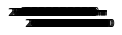

In [9]:
for expression in os.listdir(base_path + "train/"):
    for i in range(1,10):
        cpt = cpt + 1
        plt.subplot(432,288,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [10]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

2000 surprise images
2000 fear images
2000 neutral images
2000 happy images
2000 disgust images
2000 sad images
2000 angry images


In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
batch_size = 128

In [13]:
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
datagen_test= ImageDataGenerator()

In [14]:
Train_gen = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
Valid_gen = datagen_validation.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
test_generator = datagen_test.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 14000 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.


In [15]:
import tensorflow as tf
from keras.layers import AveragePooling2D ,Dropout ,Dense , Conv2D , Input
from keras.models import  Model

In [16]:
from keras.applications.densenet import DenseNet
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet import EfficientNetB7

In [17]:
from keras.backend import dropout
from keras.layers.serialization import activation
img_size=224
Bs=128


base_model= EfficientNetB7(include_top=False,weights='imagenet',input_shape=(img_size,img_size,3))
x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(rate=.5)(x)
x=Dense(7   ,activation='softmax')(x)
 

con_model=Model(inputs=base_model.input ,outputs=x)
for layer in base_model.layers:
  layer.trainable=False

con_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

258076736/258076736 [==============================] - 7s 0us/step


In [18]:
epochs=25
hist = con_model.fit_generator(
    Train_gen,
    epochs=epochs,
    validation_data=Valid_gen
)


<ipython-input-18-257b48d6dca4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = con_model.fit_generator(


Epoch 1/25
110/110 [==============================] - 225s 2s/step - loss: 1.2967 - accuracy: 0.5296 - val_loss: 0.8850 - val_accuracy: 0.7520
Epoch 2/25
110/110 [==============================] - 179s 2s/step - loss: 0.8477 - accuracy: 0.7259 - val_loss: 0.6161 - val_accuracy: 0.8354
Epoch 3/25
110/110 [==============================] - 179s 2s/step - loss: 0.6525 - accuracy: 0.7967 - val_loss: 0.4975 - val_accuracy: 0.8737
Epoch 4/25
110/110 [==============================] - 180s 2s/step - loss: 0.5263 - accuracy: 0.8401 - val_loss: 0.4285 - val_accuracy: 0.8880
Epoch 5/25
110/110 [==============================] - 179s 2s/step - loss: 0.4538 - accuracy: 0.8654 - val_loss: 0.3851 - val_accuracy: 0.8971
Epoch 6/25
110/110 [==============================] - 179s 2s/step - loss: 0.3989 - accuracy: 0.8814 - val_loss: 0.3703 - val_accuracy: 0.8943
Epoch 7/25
110/110 [==============================] - 179s 2s/step - loss: 0.3562 - accuracy: 0.8958 - val_loss: 0.3555 - val_accuracy: 0.8931

In [19]:
loss, accuracy = con_model.evaluate(test_generator)

14/14 [==============================] - 19s 1s/step - loss: 0.3630 - accuracy: 0.9091


In [20]:
'''''''model_json = con_model.to_json()''''
with open("model.json", "w") as json_file:
    json_file.write(model_json)'''''

'model_json = con_model.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)'

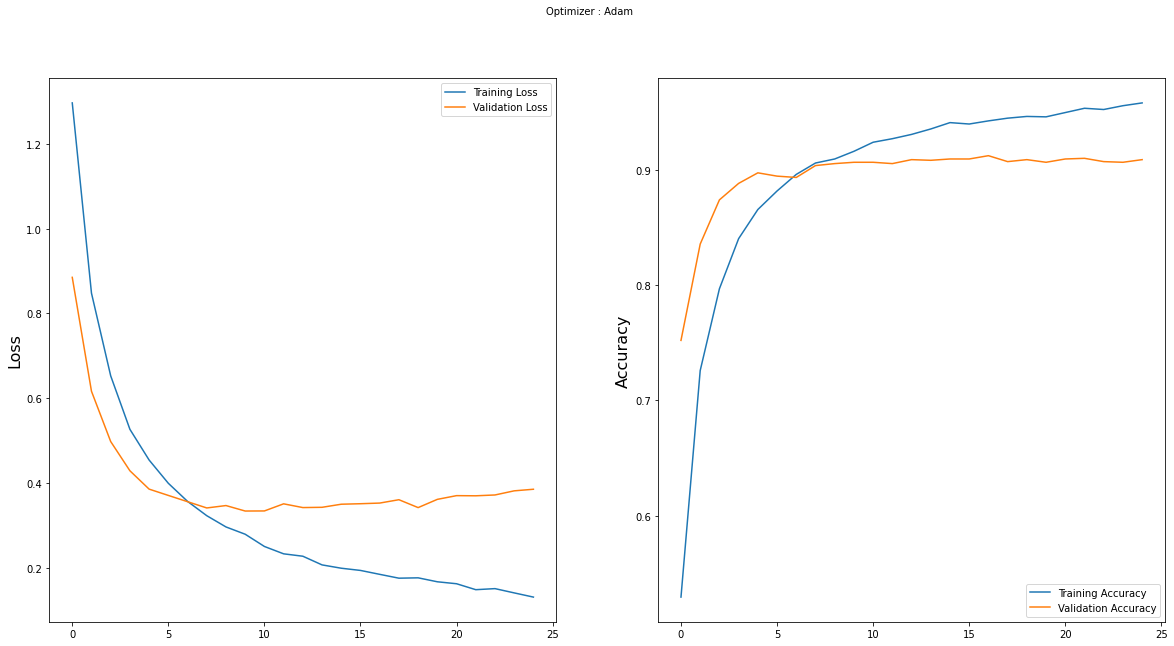

In [21]:
history=hist
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<ipython-input-22-c4935754a0a9>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = con_model.predict_generator(generator=test_generator)


<Figure size 432x288 with 0 Axes>

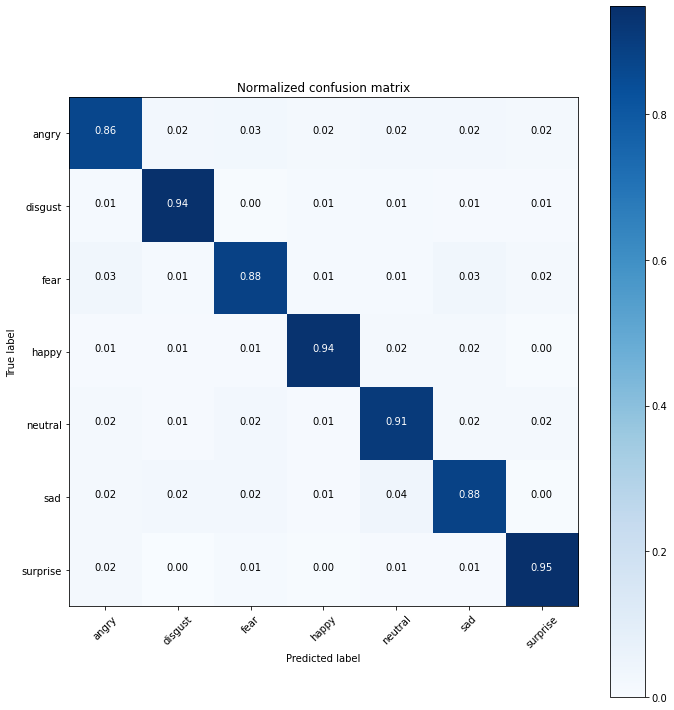

In [22]:
predictions = con_model.predict_generator(generator=test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [23]:
Train_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [24]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [26]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
plt.show()

In [27]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.885246,0.925490,0.898374,0.939759,0.886719,0.894309,0.933071,0.909143,0.908995,0.908995
recall,0.864000,0.944000,0.884000,0.936000,0.908000,0.880000,0.948000,0.909143,0.909143,0.909143
f1-score,0.874494,0.934653,0.891129,0.937876,0.897233,0.887097,0.940476,0.909143,0.908994,0.908994
support,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,0.909143,1750.000000,1750.000000
